In [27]:
pip install lxml


     |████████████████████████████████| 5.5MB 21.2MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [28]:
pip install beautifulsoup4


     |████████████████████████████████| 122kB 5.5MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [29]:
pip install html5lib


Note: you may need to restart the kernel to use updated packages.


In [30]:
pip install requests

Note: you may need to restart the kernel to use updated packages.


In [31]:
from bs4 import BeautifulSoup
import requests
import csv
import pandas as pd
import urllib.request
import re

### Scraping data from Bangaloremirror which has scheduled updates 

In [32]:
masterlink = 'https://bangaloremirror.indiatimes.com/bangalore/others/karnataka-covid-19-tracker/articleshow/74892676.cms'
mastersource = requests.get(masterlink).text
mastersoup = BeautifulSoup(mastersource,'lxml')
normal = mastersoup.find(class_='Normal')

In [33]:
n = normal.text
n = n.replace('\n\n','')
n = n.replace('.*','\n')
k = n.replace('. *','\n')
#j = n.find('discharged')
print(k)

Karnataka, in total, has registered 1462 cases, including 41 deaths and 556 discharges, until May 20 
Here are the details about all the positive cases in Karnataka with their respective locations and travel histories.
*Patient number 1462 is a 30-year-old female from Raichur, with a travel history to Mumbai
Patient number 1461 is a 12-year-old female from Raichur, with a travel history to Mumbai. 
*Patient number 1460 is a 40-year-old female from Raichur, with a travel history to Mumbai. 
*Patient number 1459 is a 26-year-old female from Raichur, with a travel history to Mumbai. 
*Patient number 1458 is a 40-year-old female from Bidar, and a contact of P-590. 
*Patient number 1457 is a nine-year-old female from Bidar, and a contact of P-648.
*Patient number 1456 is a 72-year-old male from Bidar, and a contact of P-981.
*Patient number 1455 is a 45-year-old male from Bidar, and a contact of P-943.
*Patient number 1454 is a 15-year-old male from Bidar, and a contact of P-943.
*Patient n

### After cleaning (some of it manually) following dataset is obtained

In [25]:
pd.set_option('display.max_rows', df.shape[0]+1)

In [26]:
df = pd.read_csv('KrCOV4.csv')
#df.columns=["MapName","Wins","Side"]
#df.head

df

,patient_number,age,gender,residence,info
0,*Patient number 1462,30,female,Raichur,a travel history to Mumbai
1,Patient number 1461,12,female,Raichur,a travel history to Mumbai
2,*Patient number 1460,40,female,Raichur,a travel history to Mumbai
3,*Patient number 1459,26,female,Raichur,a travel history to Mumbai
4,*Patient number 1458,40,female,Bidar,contact of P-590
5,*Patient number 1457,9,female,Bidar,contact of P-648
6,*Patient number 1456,72,male,Bidar,contact of P-981
7,*Patient number 1455,45,male,Bidar,contact of P-943
8,*Patient number 1454,15,male,Bidar,contact of P-943
9,*Patient number 1453,56,male,Bidar,contact of P-772


In [21]:
print(df.shape)

(1466, 5)


In [11]:
#patient, age , sex, residence, travel history, status
df.columns

In [9]:
from pylab import rcParams

In [11]:
rcParams['figure.figsize'] = 9, 6

Text(0.5, 0, 'Age')

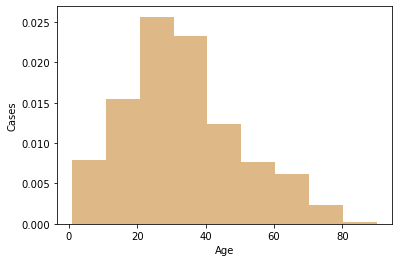

In [12]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
#np.random.seed(42)
x = df['age']
plt.hist(x, density=True, bins=9, color='burlywood')  # `density=False` would make counts
plt.ylabel('Cases')
plt.xlabel('Age')

An overall histogram of all cases and its density to both sexes

In [13]:
male = df[df['gender']==' male']
female = df[df['gender']=='female']

90


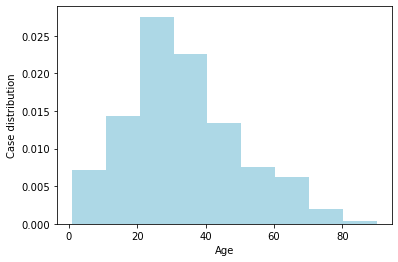

In [14]:
m = male['age']
plt.hist(m, density=True, bins=9, color='lightblue')
plt.ylabel('Case distribution')
plt.xlabel('Age')
print(m.max())

#### Case Distribution of Men in Karnataka

80


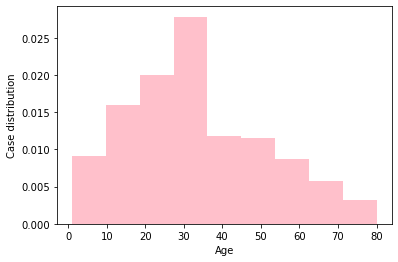

In [15]:
f = female['age']
plt.hist(f, density=True, bins=9, color='pink')  # `density=False` would make counts
plt.ylabel('Case distribution')
plt.xlabel('Age')
print(f.max())

#### Case Distribution of Women in Karnataka

# Conclusions that can be drawn from above two histograms:

O  Women above the age 60 have been tested positive more than men

O  Women below age 20 have more cases than men

O  In both sexes, age 20 to 40 has the majority of cases, where- Men have more cases 

O In the age group 40 to 60, the slope is lesser for women than men

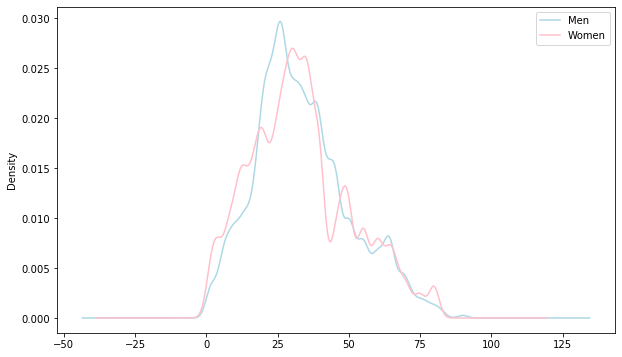

In [16]:
ddff = pd.DataFrame({
    'Men': male.age,
    'Women': female.age,
})
den= ddff.plot.kde(color=('lightblue','pink'), bw_method=0.1,figsize=(10,6))

O The graph shows a more clear picture of the distribution of the cases according to gender

O It can be seen that the *'Men Cases' is "Spikey"* in distribution with *crest* near age *25*, Whereas the *'Women Cases'* is much *more distributed in comparision*

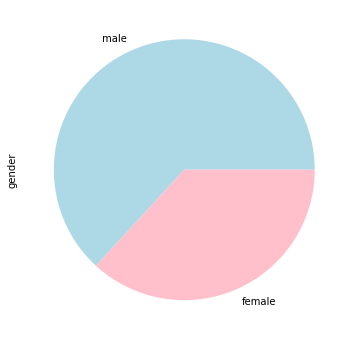

In [18]:
c=df['gender'].value_counts(normalize=True)
pie = c.plot.pie(colors=('lightblue','pink'),figsize= (10,6))

O The distribution of cases according to gender shows Men contributes majority of cases 